# Box Office Analysis

## by Justin Sierchio

In this analysis, we will be looking at box office receipts for films between 1977 and 2019. We would like to be able to answer the following:

<ul>
    <li>What studios have the best return on investment?</li>
    <li>What changes have occurred in blockbuster films over the dataset's time period?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/narmelan/top-ten-blockbusters-20191977/download. More information related to the dataset can be found at: https://www.kaggle.com/narmelan/top-ten-blockbusters-20191977.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_BOXOFFICE = pd.read_excel("Blockbusters_2019-1977.xlsx");

print('Datasets uploaded!');

Datasets uploaded!


Note: In order to solve encoding issues, I resaved the .csv file as an Excel spreadsheet and used the 'read_excel' function in Pandas to reload the dataset.

In [3]:
# Display 1st 5 rows from Jeopardy dataset
df_BOXOFFICE.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,858373000,Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,260000000,118,Walt Disney,1656943394,543638043,Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,150000000,103,Walt Disney,1420560456,470089732,Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000,129,Sony Pictures,1131927996,390532085,Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,175000000,123,Walt Disney,1128274794,426829839,Action,Adventure,Sci-Fi


Finally, let's formally define each of the columns in this dataset.

<ul>
    <li> release_year: the year the film was released in theaters</li>
    <li> rank_in_year: the rank in worldwide gross for the film in that year</li>
    <li> imdb_rating: the rating of the film according to the Internet Movie Database</li>
    <li> mpaa_rating: the rating of the film according to the MPAA</li>
    <li> film_title: the title of the film</li>
    <li> film_budget: budget of the film (US Dollars)</li>
    <li> length_in_min: the length of the film in minutes</li>
    <li> domestic distributor: the distributor of the film in its home country</li>
    <li> worldwide gross: receipts of the film worldwide</li>
    <li> domestic gross: receipts of the film in its home market</li>
    <li> genre_1, genre_2, genre_3: category of the film's subject matter</li>
</ui>

# Data Cleaning

Now let's commence with any necessary data cleaning. We'll begin by looking at the data types.

In [4]:
# Show data types for dataset
df_BOXOFFICE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating           429 non-null    object 
 4   film_title            430 non-null    object 
 5   film_budget           430 non-null    int64  
 6   length_in_min         430 non-null    int64  
 7   domestic_distributor  430 non-null    object 
 8   worldwide_gross       430 non-null    int64  
 9   domestic_gross        430 non-null    int64  
 10  genre_1               430 non-null    object 
 11  genre_2               409 non-null    object 
 12  genre_3               324 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 43.8+ KB


We immediately see that several films do not have second and third genres, as well as one film lacks an MPAA rating. Since we want to be able to use as many films as possible in our analysis, let's convert the missing second and third genres to 'Blank' and the one MPAA rating to a generic PG (since that is frequently the most common rating).

In [5]:
# Convert 'NULL' values to 'Blank' in box office dataset
df_BOXOFFICE['mpaa_rating'].fillna('PG', inplace = True)
df_BOXOFFICE['genre_2'].fillna('Blank', inplace = True)
df_BOXOFFICE['genre_3'].fillna('Blank', inplace = True)

# Show updated dataset
df_BOXOFFICE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_year          430 non-null    int64  
 1   rank_in_year          430 non-null    int64  
 2   imdb_rating           430 non-null    float64
 3   mpaa_rating           430 non-null    object 
 4   film_title            430 non-null    object 
 5   film_budget           430 non-null    int64  
 6   length_in_min         430 non-null    int64  
 7   domestic_distributor  430 non-null    object 
 8   worldwide_gross       430 non-null    int64  
 9   domestic_gross        430 non-null    int64  
 10  genre_1               430 non-null    object 
 11  genre_2               430 non-null    object 
 12  genre_3               430 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 43.8+ KB


All the dataset cells are filled and the datatypes correspond well to the columns. This dataset should be ready for exploratory analysis.

# Exploratory Data Analysis

Let's first look at the ranges associated with the film IMDB ratings, budgets, time lengths, and worldwide & domestic grosses.

Text(0.5, 1.0, 'IMDB Distribution for Blockbuster films (1977-2019)')

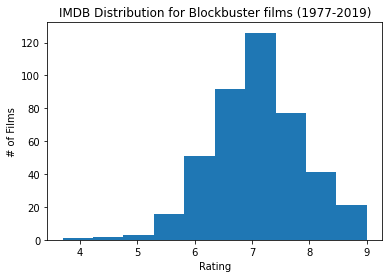

In [6]:
# Create a histogram showing IMDB film ratings for the box office blockbuster dataset.
plt.hist(df_BOXOFFICE['imdb_rating'], bins = 10)
plt.xlabel('Rating')
plt.ylabel('# of Films')
plt.title('IMDB Distribution for Blockbuster films (1977-2019)')

As we can see, blockbuster films typically score between 6 to 8 on the IMDB rating scale.

Text(0.5, 1.0, 'Budget Distribution for Blockbuster films (1977-2019)')

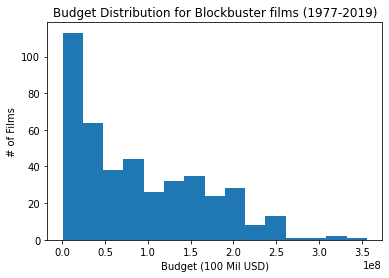

In [7]:
# Create a histogram showing budgets for the box office blockbuster dataset.
plt.hist(df_BOXOFFICE['film_budget'], bins = 15)
plt.xlabel('Budget (100 Mil USD)')
plt.ylabel('# of Films')
plt.title('Budget Distribution for Blockbuster films (1977-2019)')

As we can see, blockbuster films typically have budgets less than 150 million USD.

Text(0.5, 1.0, 'Film Length Distribution for Blockbuster films (1977-2019)')

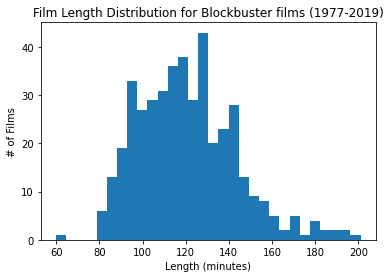

In [8]:
# Create a histogram showing time lengths for the box office blockbuster dataset.
plt.hist(df_BOXOFFICE['length_in_min'], bins = 30)
plt.xlabel('Length (minutes)')
plt.ylabel('# of Films')
plt.title('Film Length Distribution for Blockbuster films (1977-2019)')

We see that blockbusters rarely have lengths before approximately 90 minutes and are rarely longer than 140 minutes.

Let's look at the worldwide and domestic grosses.

Text(0.5, 1.0, 'Worldwide Gross for Blockbuster films (1977-2019)')

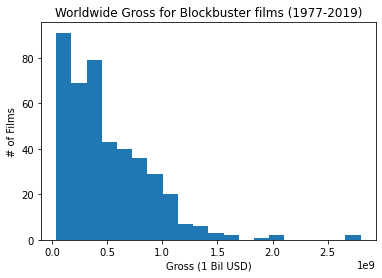

In [9]:
# Create a histogram showing grosses for the box office blockbuster dataset.
plt.hist(df_BOXOFFICE['worldwide_gross'], bins = 20)
plt.xlabel('Gross (1 Bil USD)')
plt.ylabel('# of Films')
plt.title('Worldwide Gross for Blockbuster films (1977-2019)')

The highest number of grosses for films considered blockbusters worldwide is between 100 and 500 mil USD.

Text(0.5, 1.0, 'Domestic Gross for Blockbuster films (1977-2019)')

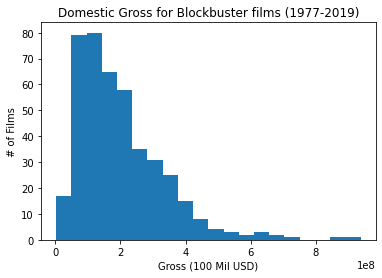

In [10]:
# Create a histogram showing grosses for the box office blockbuster dataset.
plt.hist(df_BOXOFFICE['domestic_gross'], bins = 20)
plt.xlabel('Gross (100 Mil USD)')
plt.ylabel('# of Films')
plt.title('Domestic Gross for Blockbuster films (1977-2019)')

For domestic gross the common figures are around 150 to 250 mil USD.

Now let's look at the distribution of genres for blockbuster films.

In [11]:
# List the most common genres for blockbuster films
print('Here are the Top 10 genres for blockbuster films:\n')
df_BOXOFFICE['genre_1'].value_counts()

Here are the Top 10 genres for blockbuster films:



Action       194
Comedy        69
Animation     55
Adventure     46
Drama         37
Crime         11
Biography      7
Horror         5
Family         3
Mystery        1
Sci-Fi         1
Musical        1
Name: genre_1, dtype: int64

So as we can see, action and comedy films are the most common blockbusters.

# More Focused Analysis

At this point, we want to begin to answer some the questions we posed at the beginning of this project. As a reminder, let's write them here again:

<ul>
    <li>What studios have the best return on investment?</li>
    <li>What changes have occurred in blockbuster films over the dataset's time period?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

Let's begin with the question regarding studios. In order to answer this question, we need to add a column describing the "return on investment" for each film.

Doing some research shows that the film's total expense (including advertising, distribution and marketing costs) is roughly 1.5x the actual film budget. For example, if a film budget is listed at 100 million, the actual total cost might be more like 150 million.

Regarding box office receipts, studios typically keep about 60% of the domestic (US & Canada) box office gross, and anywhere between 20-40% of the overseas gross.

So in order to complete this question, we will need to calculate:
<ul>
    <li>The film's total expense.</li>
    <li>Overseas box office receipts.</li>
    <li>Domestic box office take.</li>
    <li>Overseas box office take (using a rough average of 30%).</li>
    <li>Combined studio revenue (domestic + overseas take).</li>
    <li>Return on investment (net profit / film's total expense).</li>    
</ul>

Now that we have our categories, let's begin populating these additional columns.

In [12]:
# Find the film's total expense
df_BOXOFFICE['total_expense'] = df_BOXOFFICE['film_budget'] * 1.5;

# Find the film's overseas box office receipts
df_BOXOFFICE['overseas_gross'] = df_BOXOFFICE['worldwide_gross'] - df_BOXOFFICE['domestic_gross'];

# Find the domestic and overseas box office studio takes
df_BOXOFFICE['domestic_take'] = df_BOXOFFICE['domestic_gross'] * 0.6;
df_BOXOFFICE['overseas_take'] = df_BOXOFFICE['overseas_gross'] * 0.3;

# Find the film's total studio revenue
df_BOXOFFICE['studio_revenue'] = df_BOXOFFICE['domestic_take'] +  df_BOXOFFICE['overseas_take'];

# Find the film's return on investment[ROI]
df_BOXOFFICE['ROI'] = df_BOXOFFICE['studio_revenue'] / df_BOXOFFICE['total_expense'];

Let's make sure the new columns are loading properly.

In [13]:
df_BOXOFFICE.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,total_expense,overseas_gross,domestic_take,overseas_take,studio_revenue,ROI
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,858373000,Action,Adventure,Drama,534000000.0,1939427564,515023800.0,581828269.2,1.096852e+09,2.054030
1,2019,2,7.0,PG,The Lion King,260000000,118,Walt Disney,1656943394,543638043,Animation,Adventure,Drama,390000000.0,1113305351,326182825.8,333991605.3,6.601744e+08,1.692755
2,2019,3,7.2,PG,Frozen II,150000000,103,Walt Disney,1420560456,470089732,Animation,Adventure,Comedy,225000000.0,950470724,282053839.2,285141217.2,5.671951e+08,2.520867
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000,129,Sony Pictures,1131927996,390532085,Action,Adventure,Sci-Fi,240000000.0,741395911,234319251.0,222418773.3,4.567380e+08,1.903075
4,2019,5,6.9,PG-13,Captain Marvel,175000000,123,Walt Disney,1128274794,426829839,Action,Adventure,Sci-Fi,262500000.0,701444955,256097903.4,210433486.5,4.665314e+08,1.777262


Since our columns are working correctly, let's look at the top 10 ROI films in this dataset.

In [14]:
# Find the top 10 ROI films in the blockbuster dataset
df_BOXOFFICE_ROI = df_BOXOFFICE[['film_title', 'ROI']]
df_BOXOFFICE_ROI.sort_values('ROI', ascending = False)
print('Top 10 ROI films:\n')
print(df_BOXOFFICE_ROI.sort_values('ROI', ascending = False).head(10))

Top 10 ROI films:

                             film_title        ROI
419                           Halloween  57.846154
178            My Big Fat Greek Wedding  24.407290
422                Saturday Night Fever  22.088425
370        E.T. the Extra-Terrestrial    19.478056
410                              Grease  17.538591
229                      The Full Monty  17.365073
376                             Porky's  16.878797
413     National Lampoon's Animal House  16.012150
420  Star Wars: Episode IV - A New Hope  14.732358
257         Four Weddings and a Funeral  13.563712


As we can see, the film's with the best ROI are less intuitive, including 'Halloween', 'My Big Fat Greek Wedding', and 'Saturday Night Fever.' We do some unsurprising films in the Top 10 however, including 'E.T the Extra-Terrestrial' and 'Star Wars: Episode IV - A New Hope'.

Let's take a look at the films on the blockbuster list with the lowest ROI.

In [15]:
# Find the bottom 10 ROI films in the blockbuster dataset
df_BOXOFFICE_ROI.sort_values('ROI', ascending = False)
print('Bottom 10 ROI films:\n')
print(df_BOXOFFICE_ROI.sort_values('ROI', ascending = False).tail(10))

Bottom 10 ROI films:

                                   film_title       ROI
228                         The Fifth Element  0.704818
239                                    Eraser  0.687182
136                     X-Men: The Last Stand  0.661712
169                               Bad Boys II  0.633766
97                                    Tangled  0.610764
219                           Lethal Weapon 4  0.594127
166        Terminator 3: Rise of the Machines  0.583742
119  The Chronicles of Narnia: Prince Caspian  0.498922
138                          Superman Returns  0.437898
248                                Waterworld  0.402817


Some of the lowest ROI films include 'The Fifth Element', 'Tangled', and 'Waterworld,' which only (using our assumptions) recouped roughly 40% of its expense at the box office.

Now let's look at the studios specifically and see which have the best ROI. Let's begin by determining how many studios are in our dataset.

In [19]:
# Determine number of studios in dataset
df_BOXOFFICE['domestic_distributor'].nunique()

25

We see there are 25 studios that have blockbuster films in this dataset. Let's determine what those studios are and how many films each has.

In [20]:
# Determine number of studios' blockbusters in dataset
df_BOXOFFICE['domestic_distributor'].value_counts()

Walt Disney                        76
Warner Bros.                       71
Universal Pictures                 58
Paramount Pictures                 51
Twentieth Century Fox              49
Sony Pictures                      31
DreamWorks                         17
Columbia Pictures                  15
Metro-Goldwyn-Mayer                13
TriStar Pictures                    9
United Artists                      8
New Line Cinema                     8
Orion Pictures                      6
Lionsgate                           5
Summit Entertainment                3
American International Pictures     1
Embassy Pictures                    1
The H Collective                    1
Compass International Pictures      1
IFC Films                           1
Icon Productions                    1
Rank Film Distributors              1
Fox Searchlight Pictures            1
Vestron Pictures                    1
Miramax                             1
Name: domestic_distributor, dtype: int64

As we can see, Walt Disney studios has the most films (76) followed by Warner Bros. (71) and Universal Pictures (58).

In order to determine which studio has the best ROI, we will need to add up all the projected total expenses for film by studio and divide that into the studio revenues. To avoid statistically questionable outliers, we'll only look at studios with at least 5 films in the blockbuster dataset.